In [4]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [141]:
cities = gpd.read_file("zip:///Users/tsen6/Desktop/Python/tl_2019_24_tract.zip")
#                        ") tl_2019_us_zcta510.zip

In [142]:
cities.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

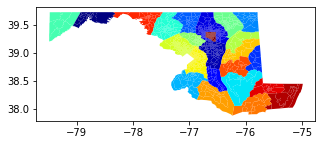

In [7]:
cities.plot(cmap = 'jet',column = 'COUNTYFP',figsize=[5,5])

In [8]:
# #lons_lats_vect = np.column_stack((lons_vect, lats_vect)) # Reshape coordinates
# polygon = cities.geometry[4] # create polygon
# point = Point(42.348495, -83.060303) # create point
# print(polygon.contains(point)) # check if polygon contains point
# print(point.within(polygon)) # check if a point is in the polygon 

array(['1509', '2403', '2501.01', '2501.02', '2501.03', '2502.03', '2404',
       '2502.04', '603', '2608', '808', '2609', '2302', '2705.01', '1602',
       '1001', '1303', '601', '2803.01', '1601', '1801', '1302', '1304',
       '1306', '1307', '1308.03', '1308.04', '1308.05', '2502.05', '1501',
       '909', '1204', '2707.01', '803.01', '102', '2718.01', '807',
       '2610', '2607', '2007.02', '1603', '602', '1802', '2606.04',
       '2804.02', '101', '103', '104', '105', '201', '202', '203', '301',
       '1605', '1308.06', '1402', '1403', '1502', '1503', '1504', '1505',
       '1506', '1507.01', '1507.02', '1606', '2718.02', '2719', '1510',
       '1511', '1508', '2502.06', '2502.07', '2503.01', '2503.03',
       '2504.01', '2504.02', '2720.03', '2801.01', '2801.02', '2802',
       '2803.02', '302', '401', '402', '604', '701', '702', '703', '704',
       '1202.02', '2720.05', '1202.01', '2720.04', '2720.06', '2805',
       '2602.02', '2602.03', '2603.01', '2603.02', '2603.03', '26

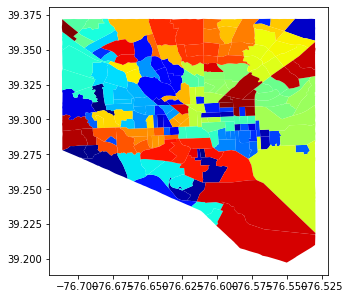

In [9]:
cities['COUNTYFP'] = cities['COUNTYFP'].astype(str).astype(int)
baltimore_counties = [510] #[163] #[87,93,99,125,147,163]
baltimore = gpd.GeoDataFrame()
for county in baltimore_counties:
    #print(county)
    temp = cities[cities['COUNTYFP']==county]
    #print(temp)
    baltimore = baltimore.append(temp)
    
baltimore.plot(cmap = 'jet',figsize=[5,5]) #,column = 'COUNTYFP'
baltimore.NAME.unique()

In [214]:
len(baltimore)

200

In [84]:
import pandas as pd
df = pd.read_csv('C:/Users/tsen6/Desktop/Python/Analysis911/911_Police_Calls_for_Service.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823490 entries, 0 to 7823489
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   RecordID                     int64  
 1   CallNumber                   object 
 2   CallDateTime                 object 
 3   Priority                     object 
 4   District                     object 
 5   Description                  object 
 6   IncidentLocation             object 
 7   ZipCode                      float64
 8   Neighborhood                 object 
 9   PoliceDistrict               object 
 10  PolicePost                   float64
 11  CouncilDistrict              float64
 12  SheriffDistricts             object 
 13  Community_Statistical_Areas  object 
 14  Census_Tracts                object 
 15  VRIZones                     object 
 16  Location                     object 
 17  2010 Census Neighborhoods    float64
 18  2010 Census Wards Precincts  float64
 19  

In [168]:
# dfNew = df[(df['Priority']=='High') | (df['Priority']=='Emergency')]
dfNew = df
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823490 entries, 0 to 7823489
Data columns (total 20 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   RecordID                     int64         
 1   CallNumber                   object        
 2   CallDateTime                 datetime64[ns]
 3   Priority                     object        
 4   District                     object        
 5   Description                  object        
 6   IncidentLocation             object        
 7   ZipCode                      float64       
 8   Neighborhood                 object        
 9   PoliceDistrict               object        
 10  PolicePost                   float64       
 11  CouncilDistrict              float64       
 12  SheriffDistricts             object        
 13  Community_Statistical_Areas  object        
 14  Census_Tracts                object        
 15  VRIZones                     object        
 16  

In [86]:
dfNew = dfNew.dropna(subset=['Census_Tracts'])
dfNew = dfNew[['RecordID','CallNumber','CallDateTime','Census_Tracts','Description','Priority']]

def cen_tract(tract_string):
    tract = (tract_string.split()[2])
    return tract
# dfNew.Census_Tracts[12]

# float(dfNew.Census_Tracts[12].split()[2])
dfNew['Census_Tracts'] = dfNew.apply(lambda x: cen_tract(x['Census_Tracts']),axis=1)

In [87]:
dfNew['Description'].unique()

array(['Hot Spot Check', 'Business Check', 'Foot  Patrol', ..., '*3Q',
       '*SMALL SINKHOLE', '*INV - SEE TEXT'], dtype=object)

In [88]:
new = pd.DataFrame()
new['Details']=dfNew['Description'].unique()
new.to_csv('Description.csv')

In [89]:
dfNew['CallDateTime']=pd.to_datetime(dfNew['CallDateTime'])

In [90]:
# dfNew = dfNew.drop(columns=['CallNumber'])
dfNew = dfNew.sort_values(by=['Census_Tracts'])
dfNew.to_csv('Baltimore911.csv')

In [91]:
dfNew[dfNew['Census_Tracts']=='1001'].sort_values(by=['CallDateTime'])
dfNew['Count']=1
dfNew

,RecordID,CallNumber,CallDateTime,Census_Tracts,Description,Priority,Count
6837623,4539305,142820833,2014-10-09 09:10:00,1001,Repairs/Service,Non-Emergency,1
1971888,1159856,P180060408,2018-01-06 03:55:00,1001,LARCENY F/AUTO,Low,1
7803067,5816146,132200247,2013-08-08 02:36:00,1001,Family Disturb,Medium,1
1971890,1158535,P180061866,2018-01-06 19:22:00,1001,Traffic Stop,High,1
4338464,1688618,P171733326,2017-06-22 23:42:00,1001,Traffic Stop,High,1
...,...,...,...,...,...,...,...
6794585,4483843,143011699,2014-10-28 15:28:00,909,Subject stop,Low,1
4700162,3366210,P153171757,2015-11-13 14:39:00,909,DEPT ACCIDENT,Low,1
6296861,5586226,132923423,2013-10-19 23:51:00,909,Other,Low,1
7595054,5528745,133121444,2013-11-08 13:04:00,909,Suspicious Pers,Medium,1


In [150]:
dNew0 = dfNew[(dfNew['CallDateTime'].dt.year > 2012) &
            (dfNew['CallDateTime'].dt.year < 2019)]

(1500, 3500)

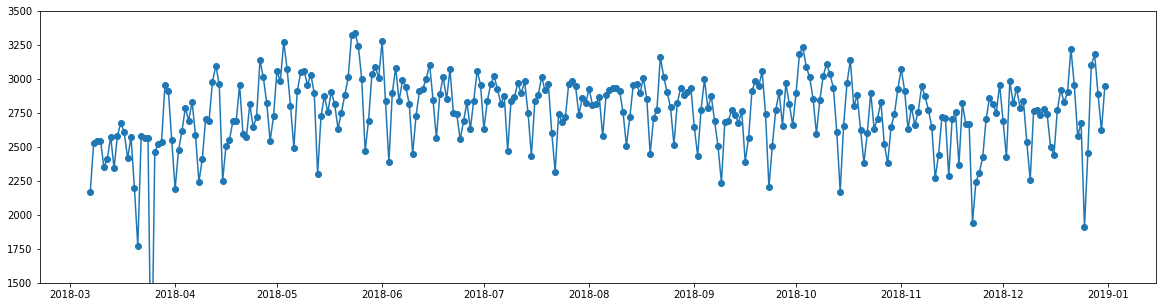

In [239]:
dfX = dNew0 #[(dNew0['Priority']=='Low')]# | (dNew0['Priority']=='Medium')]# | 
#       (dNew0['Priority']=='Emergency')]
dfSum = dfX['Count'].groupby(dfX['CallDateTime'].dt.date).sum()
dfSum = pd.DataFrame(dfSum) 
dfSum['Date'] = dfSum.index
# dfX.info() #dfNew[(dfNew['Priority']=='Low')] #

dfSum['Date']=pd.to_datetime(dfSum['Date'])
dfSum.Date.dt.year
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot_date(dfSum.Date[-300:], dfSum.Count[-300:], linestyle = '-')
ax.set_ylim(1500,3500)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

In [169]:
df['CallDateTime']=pd.to_datetime(df['CallDateTime'])

In [203]:
df0 = df
df.info()
df = df.dropna(subset=['Zip Codes'])
df = df[(df['CallDateTime'].dt.year > 2012) &
            (df['CallDateTime'].dt.year < 2019)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5989253 entries, 3 to 7823489
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   RecordID                     int64         
 1   CallNumber                   object        
 2   CallDateTime                 datetime64[ns]
 3   Priority                     object        
 4   District                     object        
 5   Description                  object        
 6   IncidentLocation             object        
 7   ZipCode                      float64       
 8   Neighborhood                 object        
 9   PoliceDistrict               object        
 10  PolicePost                   float64       
 11  CouncilDistrict              float64       
 12  SheriffDistricts             object        
 13  Community_Statistical_Areas  object        
 14  Census_Tracts                object        
 15  VRIZones                     object        
 16  

In [221]:
df['Count']=1
zips = df['Zip Codes'].unique()
dfAgg = pd.DataFrame()
for z in zips:
    Temp = df[df['Zip Codes']==z]
    dfSum = Temp['Count'].groupby(Temp['CallDateTime'].dt.date).sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index    
    dfTemp['zip'] = z
    dfAgg = dfAgg.append(dfTemp)   

In [224]:
dfAgg['Date']= pd.to_datetime(dfAgg['Date'])
dfX = dfAgg[(dfAgg['zip']==zips[6])]

KeyError: 'zip'

(0, 40)

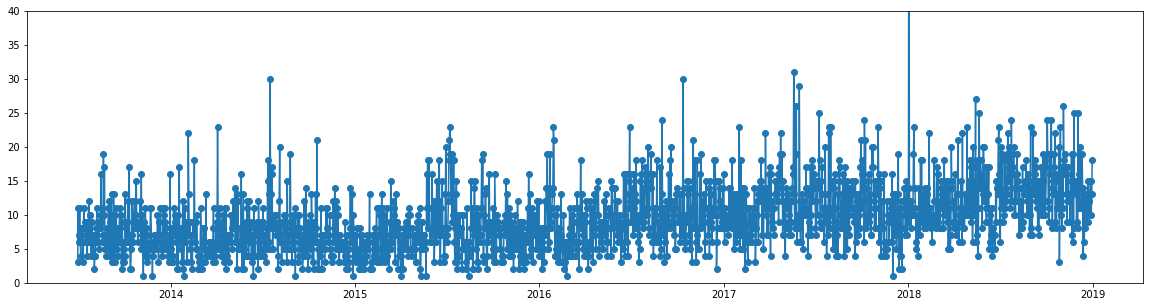

In [230]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot_date(dfX.Date, dfX.Count, linestyle = '-')
ax.set_ylim(0, 40)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

In [223]:
CDs = df['CouncilDistrict'].unique()
dfAgg = pd.DataFrame()
for cd in CDs:
    Temp = df[df['CouncilDistrict']==cd]
    dfSum = Temp['Count'].groupby(Temp['CallDateTime'].dt.date).sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index    
    dfTemp['CouncilDistrict'] = cd
    dfAgg = dfAgg.append(dfTemp)   
    
dfAgg['Date']= pd.to_datetime(dfAgg['Date'])

[nan 12. 14.  1.  3. 10. 11.  4. 13.  7.  5.  6.  2.  9.  8.]


5.0

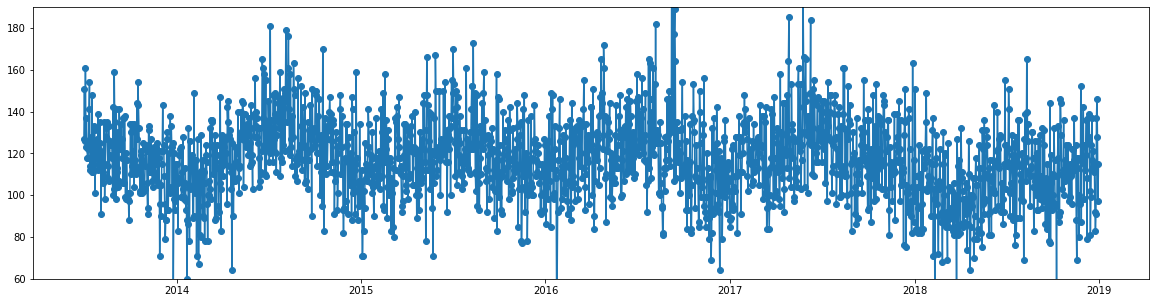

In [256]:
print(CDs)
dfX = dfAgg[(dfAgg['CouncilDistrict']==CDs[10])]

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot_date(dfX.Date, dfX.Count, linestyle = '-')
ax.set_ylim(60,190)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
CDs[10]

In [257]:
dfX

,Count,Date,CouncilDistrict
CallDateTime,,,
2013-07-01,127,2013-07-01,5.0
2013-07-02,151,2013-07-02,5.0
2013-07-03,126,2013-07-03,5.0
2013-07-04,161,2013-07-04,5.0
2013-07-05,123,2013-07-05,5.0
...,...,...,...
2018-12-27,137,2018-12-27,5.0
2018-12-28,146,2018-12-28,5.0
2018-12-29,128,2018-12-29,5.0


In [243]:
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [272]:
dfX = dfX.rename(columns={'Date': 'ds', 'Count': 'y'})
dfTrain = dfX[dfX['ds'].dt.year < 2018]
dfTest = dfX[dfX['ds'].dt.year == 2018]

# Make the prophet model and fit on the data
dis05_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
dis05_prophet.fit(dfTrain)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [277]:
# Make predictions
dfPred = dis05_prophet.predict(dfX)
# dis05_prophet.plot(dfPred, xlabel = 'Date', ylabel = '911 call volume')

19.72961115613126

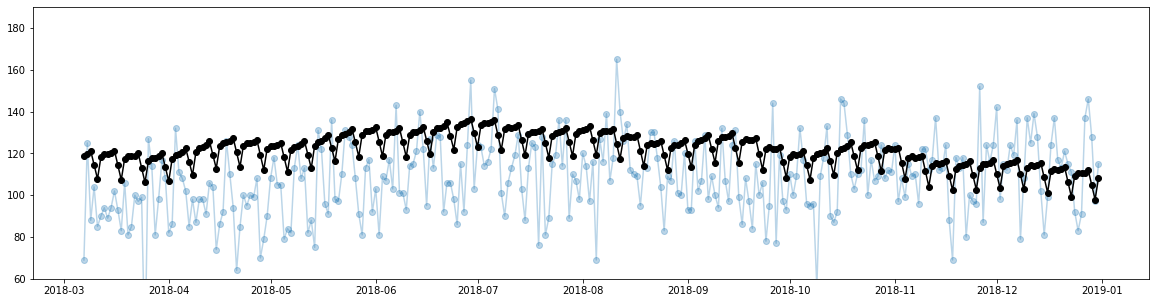

In [295]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot_date(dfX.ds[-300:], dfX.y[-300:], alpha=0.3, linestyle='-')
ax.plot_date(dfPred.ds[-300:], dfPred.yhat[-300:],color='black',linestyle='-')
ax.set_ylim(60,190)

# dfX = dfX.reset_index().drop(columns = 'CallDateTime')
# dfPred.loc[:, 'yhat'] 
# dfX.loc[:,'y']
se = np.square((dfPred.loc[:, 'yhat'] - dfX.loc[:,'y'])/dfX.loc[:,'y'])
mse = np.mean(se)
rmse = np.sqrt(mse)*100
rmse

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,114.689621,106.468536,150.498799,114.689621,114.689621,13.695947,13.695947,13.695947,0.784888,0.784888,0.784888,12.911059,12.911059,12.911059,0.0,0.0,0.0,128.385568
1,2013-07-02,114.700460,108.226097,150.332989,114.700460,114.700460,15.052287,15.052287,15.052287,2.201082,2.201082,2.201082,12.851204,12.851204,12.851204,0.0,0.0,0.0,129.752747
2,2013-07-03,114.711299,108.006393,150.903934,114.711299,114.711299,15.006907,15.006907,15.006907,2.272792,2.272792,2.272792,12.734115,12.734115,12.734115,0.0,0.0,0.0,129.718207
3,2013-07-04,114.722139,108.057102,152.069556,114.722139,114.722139,15.421834,15.421834,15.421834,2.859499,2.859499,2.859499,12.562335,12.562335,12.562335,0.0,0.0,0.0,130.143973
4,2013-07-05,114.732978,108.125004,152.652936,114.732978,114.732978,16.488199,16.488199,16.488199,4.148386,4.148386,4.148386,12.339813,12.339813,12.339813,0.0,0.0,0.0,131.221177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,2018-12-27,119.958669,88.547468,133.852587,117.087792,123.124380,-8.888881,-8.888881,-8.888881,2.859499,2.859499,2.859499,-11.748380,-11.748380,-11.748380,0.0,0.0,0.0,111.069789
2006,2018-12-28,119.958586,90.928684,133.824387,117.075501,123.133759,-7.778514,-7.778514,-7.778514,4.148386,4.148386,4.148386,-11.926900,-11.926900,-11.926900,0.0,0.0,0.0,112.180072
2007,2018-12-29,119.958503,84.008815,127.244497,117.075974,123.156556,-14.755421,-14.755421,-14.755421,-2.673425,-2.673425,-2.673425,-12.081996,-12.081996,-12.081996,0.0,0.0,0.0,105.203083
2008,2018-12-30,119.958420,77.395920,120.013954,117.057184,123.167610,-21.804871,-21.804871,-21.804871,-9.593223,-9.593223,-9.593223,-12.211648,-12.211648,-12.211648,0.0,0.0,0.0,98.153550


In [300]:
new = pd.DataFrame()
new['Details']=df[df['Priority']=='High'].Description.unique()
new.to_csv('Description.csv')

In [322]:
def run_prophet(timeseries):
    train = timeseries[timeseries['ds'].dt.year < 2018]
    model = fbprophet.Prophet()
    model.fit(train)
#     forecast = model.make_future_dataframe(periods=90, include_history=False)
    forecast = model.predict(timeseries)
    return forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14.773764862854025


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


19.23719967607372


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14.169902867211498


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20.14418086183488


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13.579555177828102


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14.643610666554046


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18.75830722985231


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


387.91319778795645


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


15.206531117574595


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


19.72961115613126


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


16.420758727467415


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


16.45135152055758


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


618.8024500460551
242.04924968940165


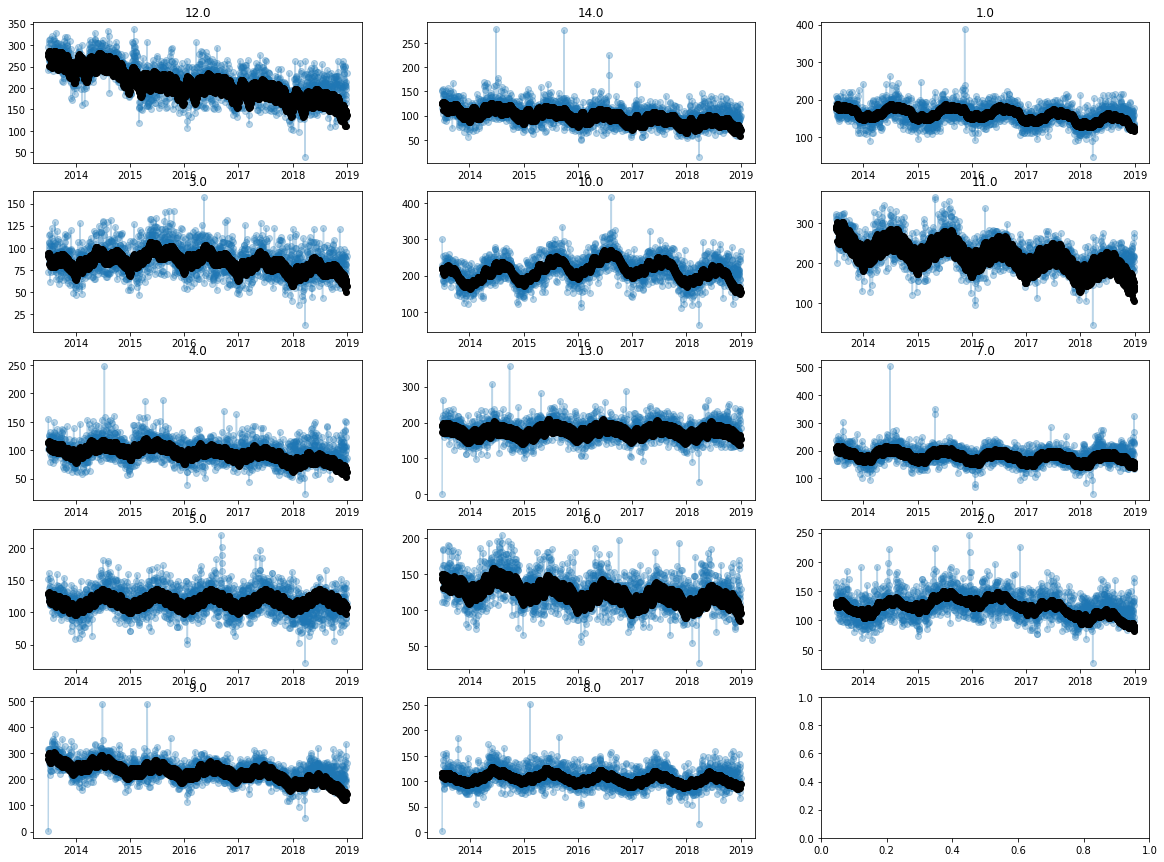

In [329]:
fig, axs = plt.subplots(5, 3, figsize=[20,15])
j = 0
for i in CDs[1:]:
    input0 = dfAgg[(dfAgg['CouncilDistrict']== i)]
    input0 = input0.rename(columns={'Date': 'ds', 'Count': 'y'})
    pred = run_prophet(input0)
    axs[int(j/3),int(j%3)].plot_date(input0.ds, input0.y, alpha=0.3, linestyle='-')
    axs[int(j/3),int(j%3)].plot_date(pred.ds, pred.yhat,color='black',linestyle='-')
    axs[int(j/3),int(j%3)].set_title(i)
    input0 = input0.reset_index().drop(columns = 'CallDateTime')
    se = np.square((pred.loc[:, 'yhat'] - input0.loc[:,'y'])/input0.loc[:,'y'])
    mse = np.mean(se)
    rmse = np.sqrt(mse)*100
    print(rmse)
    j+=1

CallDateTime
2013-07-01    127
2013-07-02    151
2013-07-03    126
2013-07-04    161
2013-07-05    123
             ... 
2018-12-27    137
2018-12-28    146
2018-12-29    128
2018-12-30     97
2018-12-31    115
Name: y, Length: 2010, dtype: int64